In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-10-04 08:41:31--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.129.128, 209.85.234.128, 108.177.112.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.129.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   111MB/s    in 1.7s    

2021-10-04 08:41:33 (111 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-10-04 08:41:33--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 64.233.181.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp

In [ ]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
local_zip2 = '/tmp/rps-test-set.zip'

data = zipfile.ZipFile(local_zip,'r')
data2 = zipfile.ZipFile(local_zip2,'r')

data.extractall('/tmp/')
data2.extractall('/tmp/')

data.close()
data2.close()

In [ ]:
train_dir = '/tmp/rps'
test_dir = '/tmp/rps-test-set'

paper_dir = os.path.join(train_dir, 'paper')
rock_dir = os.path.join(train_dir, 'rock')
scis_dir = os.path.join(train_dir, 'scissors')

print("No of paper are: " + str(len(os.listdir(paper_dir))))
print("No of rock are: " + str(len(os.listdir(rock_dir))))
print("No of scissors are: " + str(len(os.listdir(scis_dir))))
print("Total number of items in train set are: " + str(len(os.listdir(paper_dir)) + len(os.listdir(rock_dir))+len(os.listdir(scis_dir))))

No of paper are: 840
No of rock are: 840
No of scissors are: 840
Total number of items in train set are: 2520


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
model = tf.keras.models.Sequential([
                                    layers.Conv2D(64,(3,3),activation='relu', input_shape=(150,150,3)),
                                    layers.MaxPooling2D(2,2),
                                    layers.Conv2D(64,(3,3),activation='relu'),
                                    layers.MaxPooling2D(2,2),
                                    layers.Conv2D(128,(3,3),activation='relu'),
                                    layers.MaxPooling2D(2,2),
                                    layers.Conv2D(128,(3,3),activation='relu'),
                                    layers.MaxPooling2D(2,2),
                                    layers.Flatten(),
                                    layers.Dropout(0.5),
                                    layers.Dense(1024,activation='relu'),
                                    layers.Dense(3,activation='softmax')  # sigmoid is replaced by spftmax
])

model.compile(
    loss = 'categorical_crossentropy',  # binary crossentropy to categorical crossentropy
    optimizer='rmsprop',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from keras.preprocessing import image

train_datagen= IDG(
    rescale=1./255,
    rotation_range=40,
    shear_range=0.2,
    height_shift_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode='nearest'
)
test_datagen = IDG(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=126,
    target_size=(150,150),
    class_mode='categorical'     # binary is replaced by catergorical for multi classification
)
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size=124,
    target_size=(150,150),
    class_mode='categorical'   
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=25,
    validation_data = validation_generator,
    validation_steps=3,
    verbose=1
)

Epoch 1/25
20/20 [==============================] - 59s 1s/step - loss: 1.6011 - accuracy: 0.3627 - val_loss: 1.0956 - val_accuracy: 0.4274
Epoch 2/25
20/20 [==============================] - 24s 1s/step - loss: 1.0885 - accuracy: 0.3937 - val_loss: 1.0949 - val_accuracy: 0.3952
Epoch 3/25
20/20 [==============================] - 23s 1s/step - loss: 1.0855 - accuracy: 0.4179 - val_loss: 1.0463 - val_accuracy: 0.7392
Epoch 4/25
20/20 [==============================] - 24s 1s/step - loss: 0.9670 - accuracy: 0.5254 - val_loss: 0.4817 - val_accuracy: 0.8898
Epoch 5/25
20/20 [==============================] - 24s 1s/step - loss: 0.8086 - accuracy: 0.6194 - val_loss: 0.3140 - val_accuracy: 0.9543
Epoch 6/25
20/20 [==============================] - 24s 1s/step - loss: 0.7592 - accuracy: 0.6802 - val_loss: 0.6802 - val_accuracy: 0.6801
Epoch 7/25
20/20 [==============================] - 24s 1s/step - loss: 0.6535 - accuracy: 0.7365 - val_loss: 0.7409 - val_accuracy: 0.6532
Epoch 8/25
20/20 [==

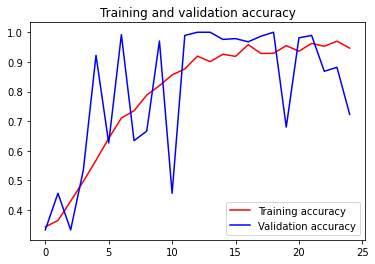

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)  # classes is a 2d array in format [[0 1 0]] or like tht
  print(fn)
  print(classes)
  if classes[0][0] == 1:
    print(fn + "is paper")
  elif classes[0][1] == 1:
    print(fn + "is rock")
  elif classes[0][2] == 1:
    print(fn + "is scissors")

Saving scissor.jfif to scissor.jfif
Saving stone.jfif to stone.jfif
scissor.jfif
[[0. 1. 0.]]
scissor.jfifis rock
stone.jfif
[[0. 1. 0.]]
stone.jfifis rock
